In [128]:
!pip install matplotlib pandas

In [129]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt



In [130]:
readings_files = ['./data/readings.tsv.2020-01-13.gz', './data/readings.tsv.2020-01-20.gz']

readings = (
    pd.concat(
        [pd.read_csv(readings_file, compression='gzip', sep='\t')
         for readings_file in readings_files], 
        axis=0)
    .reset_index(drop=True)
)
# Clean out header rows that can be somewhere mid file
readings = readings[readings.collection_time != 'collection_time']


In [131]:
readings.head()

,collection_time,temperature,pressure,humidity,light,oxidised,reduced,nh3,pm1,pm25,pm10,raw_temperature,comp_factor
0,2020-01-18 16:49:17,18.94,1024.699783,38.727080,0.0,2510.666667,324.246914,547.921569,4.0,8.0,8.0,21.37,2.8
1,2020-01-18 16:49:19,8.78,1024.715041,38.818440,0.0,2622.260870,324.246914,553.900990,4.0,7.0,7.0,13.88,2.8
2,2020-01-18 16:49:22,8.77,1024.749218,38.899010,0.0,8744.000000,10210.666667,10210.666667,4.0,6.0,6.0,13.88,2.8
3,2020-01-18 16:49:23,8.76,1024.748846,38.915093,0.0,8744.000000,10210.666667,10210.666667,5.0,7.0,7.0,13.87,2.8
4,2020-01-18 16:49:24,8.74,1024.745442,38.936497,0.0,10210.666667,10210.666667,10210.666667,5.0,7.0,7.0,13.85,2.8


In [132]:
readings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482173 entries, 0 to 482172
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   collection_time  482034 non-null  object 
 1   temperature      482173 non-null  float64
 2   pressure         482173 non-null  float64
 3   humidity         482173 non-null  float64
 4   light            482173 non-null  float64
 5   oxidised         482173 non-null  float64
 6   reduced          482173 non-null  float64
 7   nh3              482173 non-null  float64
 8   pm1              482173 non-null  float64
 9   pm25             482173 non-null  float64
 10  pm10             482173 non-null  float64
 11  raw_temperature  482173 non-null  float64
 12  comp_factor      482173 non-null  float64
dtypes: float64(12), object(1)
memory usage: 51.5+ MB


In [133]:
readings['collection_time'] = pd.to_datetime(readings['collection_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
for column in readings.columns:
    if column not in ['collection_time']:
        readings[column] = pd.to_numeric(readings[column])

In [134]:
print(readings[readings.collection_time.isnull()])

    collection_time  temperature     pressure   humidity  light    oxidised  \
474             NaT        19.29  1024.751167  40.077222    0.0   42.717949   
476             NaT         8.48  1024.766557  40.050392    0.0   47.529412   
478             NaT         8.50  1024.776353  40.034326    0.0   83.051919   
480             NaT         8.50  1024.785064  39.964553    0.0  120.504298   
482             NaT         8.50  1024.779150  40.018214    0.0  157.888889   
..              ...          ...          ...        ...    ...         ...   
614             NaT         8.63  1024.781043  40.549221    0.0  113.696970   
615             NaT         8.64  1024.782082  40.565336    0.0  112.767123   
616             NaT         8.64  1024.785896  40.538527    0.0  112.306011   
617             NaT         8.63  1024.793614  40.511695    0.0  111.847411   
618             NaT         8.61  1024.799186  40.490207    0.0  111.391304   

        reduced         nh3   pm1  pm25  pm10  raw_

In [135]:
readings.set_index('collection_time', inplace=True)

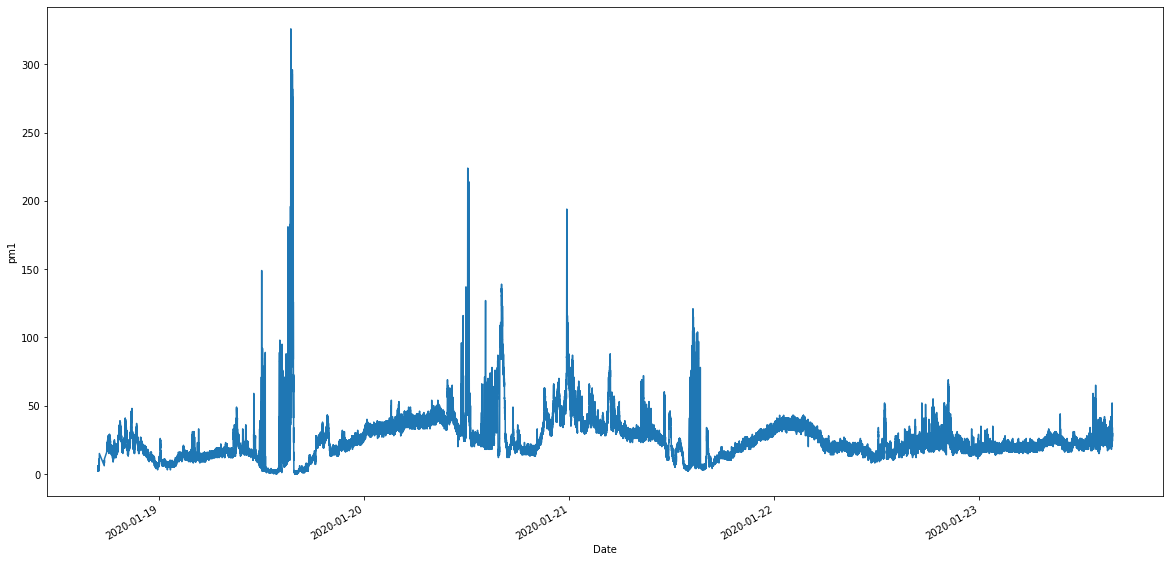

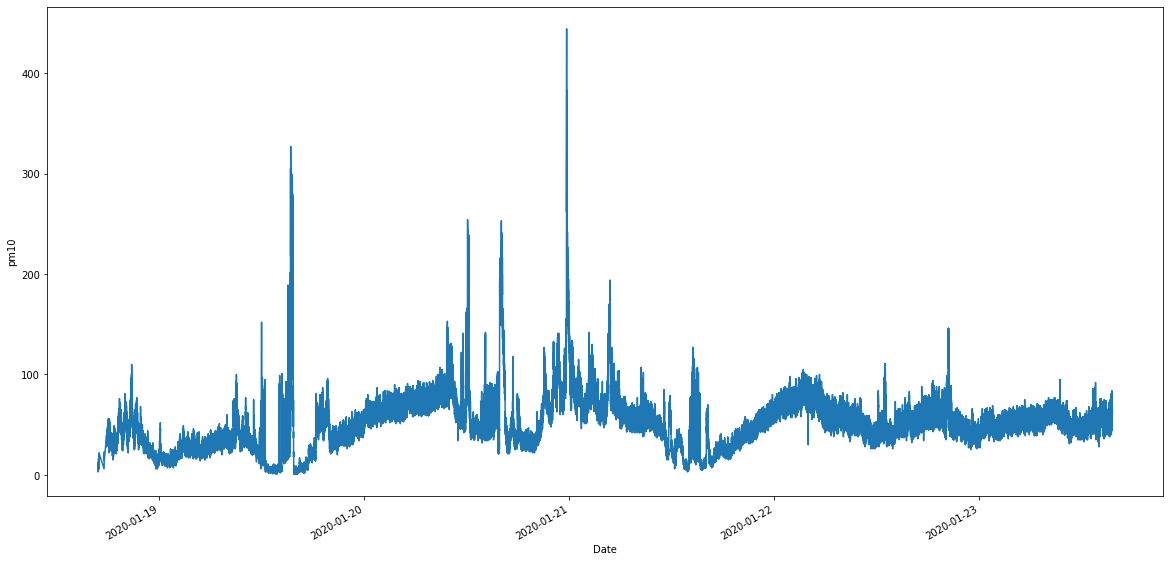

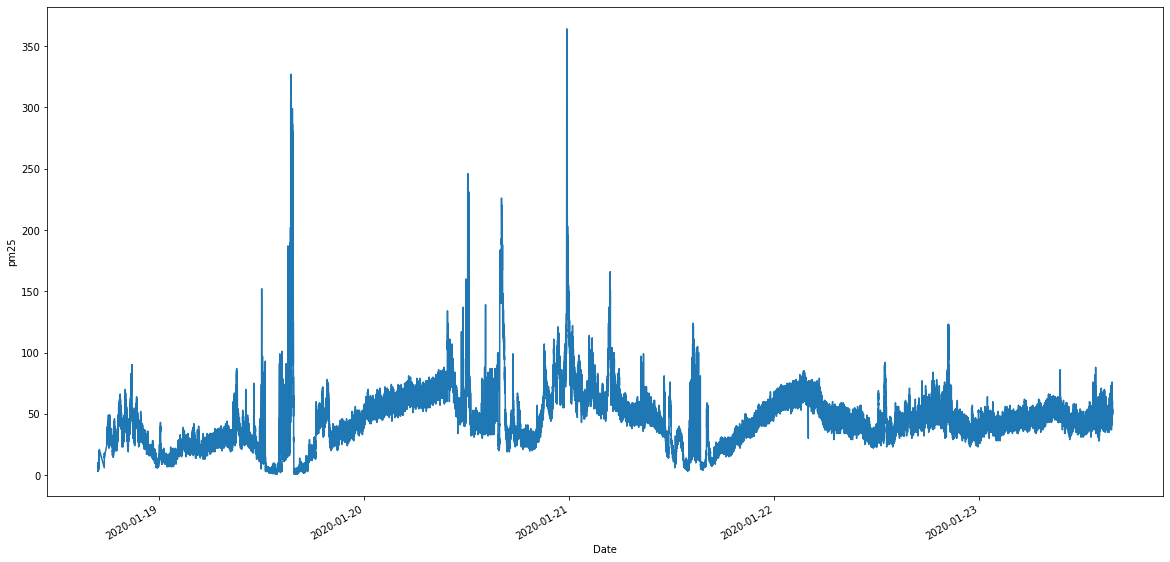

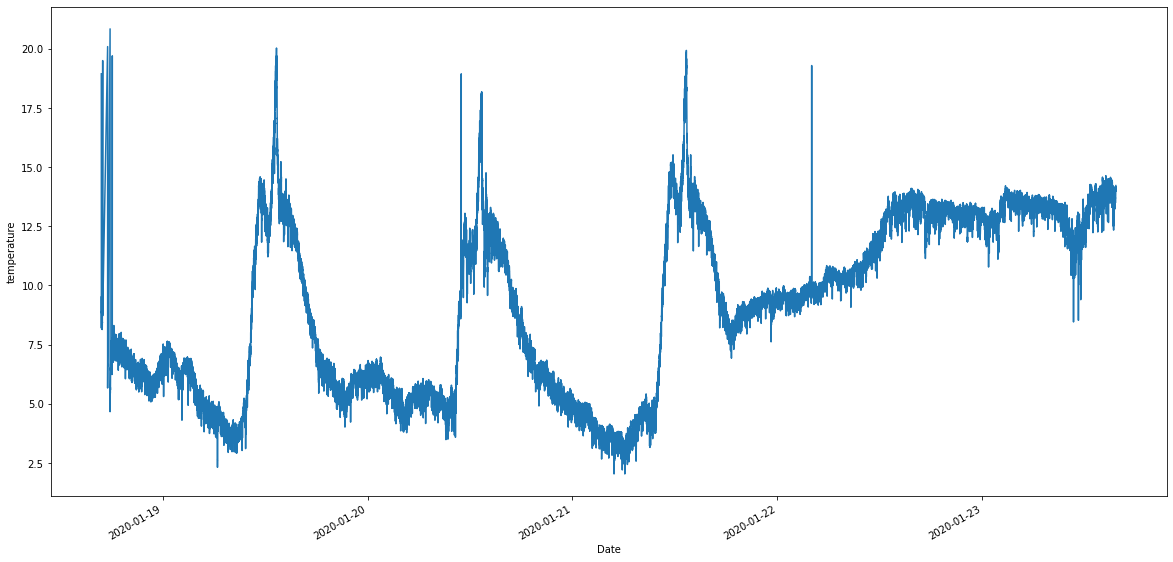

In [136]:
fig = 0
for value in ['pm1', 'pm10', 'pm25', 'temperature']:
    plt.figure(fig)
    readings[value].plot(figsize=(20,10))
    plt.xlabel('Date')
    plt.ylabel(value)
    fig += 1